# **Estatística e Otimização para Apoio à Decisão**
**Exploratory Data Analysis (EDA)** 

*João Lourenço Marques* 

-------------------------------------------------------

# **PART I - Importing libraries and dataset**

## Importing libraries

In [4]:
#Import standard packages
import os
import numpy as np
import pandas

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [ ]:
#To upload a file [Example Students_database.csv] from a local drive (see other ways to Load CSV files into Colab): https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#from google.colab import files
#uploaded = files.upload()

In [7]:
os.getcwd()

'c:\\Users\\paulo\\OneDrive\\ONEDRIVE_CLOUD_DISK\\TRABALHO_AULAS\\AL20242025\\1SEM\\EOAD\\EOAD Block 1\\EOAD_Block1_PracticeRepository\\notebooks'

In [9]:
%cd ../

c:\Users\paulo\OneDrive\ONEDRIVE_CLOUD_DISK\TRABALHO_AULAS\AL20242025\1SEM\EOAD\EOAD Block 1\EOAD_Block1_PracticeRepository


In [10]:
df = pandas.read_excel(r'.\data\Students_database.xlsx')
df

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
0,1,1º cycle,2015,8,10,8,5,male,small,9,0
1,2,1º cycle,2015,8,10,6,1,male,small,5,0
2,3,1º cycle,2015,8,10,10,14,female,small,8,0
3,4,1º cycle,2013,10,10,8,5,female,small,7,0
4,5,1º cycle,2015,8,10,9,5,female,small,8,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,3º cycle,2008,15,19,10,9,female,big,8,0
196,197,3º cycle,2010,13,19,12,16,female,big,16,0
197,198,3º cycle,2009,14,19,12,17,male,big,20,0
198,199,3º cycle,2009,14,19,8,6,male,big,11,0


The dataset contains the following attributes:
* cycleofstudy - Cycle of study (1st, 2nd and 3rd)
* age - Age fo the student 
* 1stmathstest - Mark in the first test of maths
* 2ndmathstest - Mark in the second test of maths
* 3rdmathstest - Mark in the third  test of maths
* sex - sex of the student (male or female)
* size_class - Size of the class (gig or small)
* hours - Hours of study 
* aproved - ...

# **PART II - Data Assessment**

## Understand the main structure of the dataset

In [7]:
#show the number of rows and columns
df.shape

(200, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            200 non-null    int64 
 1   cycleofstudy  200 non-null    object
 2   Ano           200 non-null    int64 
 3   age           200 non-null    int64 
 4   1stmathstest  200 non-null    int64 
 5   2ndmathstest  200 non-null    int64 
 6   3rdmathstest  200 non-null    int64 
 7   sex           200 non-null    object
 8   size_class    200 non-null    object
 9   hours         200 non-null    int64 
 10  repeating     200 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 17.3+ KB


In [13]:
#show the first 5 lines of the dataset
df.head()

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
0,1,1º cycle,2015,8,10,8,5,male,small,9,0
1,2,1º cycle,2015,8,10,6,1,male,small,5,0
2,3,1º cycle,2015,8,10,10,14,female,small,8,0
3,4,1º cycle,2013,10,10,8,5,female,small,7,0
4,5,1º cycle,2015,8,10,9,5,female,small,8,0


In [14]:
#show the last 5 lines of the dataset
df.tail(10)

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
190,191,3º cycle,2008,15,19,11,12,male,big,13,0
191,192,3º cycle,2008,15,19,11,15,male,big,16,0
192,193,3º cycle,2008,15,19,9,7,male,big,8,0
193,194,3º cycle,2009,14,19,15,18,female,big,14,0
194,195,3º cycle,2010,13,19,10,9,female,big,14,0
195,196,3º cycle,2008,15,19,10,9,female,big,8,0
196,197,3º cycle,2010,13,19,12,16,female,big,16,0
197,198,3º cycle,2009,14,19,12,17,male,big,20,0
198,199,3º cycle,2009,14,19,8,6,male,big,11,0
199,200,3º cycle,2009,14,19,9,8,female,big,13,0


In [8]:
# Checking for missing values in the data
df.isnull().sum()

ID              0
cycleofstudy    0
Ano             0
age             0
1stmathstest    0
2ndmathstest    0
3rdmathstest    0
sex             0
size_class      0
hours           0
repeating       0
dtype: int64

## Select a subset of a DataFrame

#### *Select a specific subset of the dataframe - identifying the variables* 

In [15]:
#select a specific column
df['age']

0       8
1       8
2       8
3      10
4       8
       ..
195    15
196    13
197    14
198    14
199    14
Name: age, Length: 200, dtype: int64

In [16]:
#show the data for the selected variables  
df[['cycleofstudy','sex', 'size_class']]

,cycleofstudy,sex,size_class
0,1º cycle,male,small
1,1º cycle,male,small
2,1º cycle,female,small
3,1º cycle,female,small
4,1º cycle,female,small
...,...,...,...
195,3º cycle,female,big
196,3º cycle,female,big
197,3º cycle,male,big
198,3º cycle,male,big


In [11]:
#select multiple columns  - to subset a dataframe and store it
dfn=df[['age','1stmathstest', '2ndmathstest','3rdmathstest', 'hours']]
dfn

,age,1stmathstest,2ndmathstest,3rdmathstest,hours
0,8,10,8,5,9
1,8,10,6,1,5
2,8,10,10,14,8
3,10,10,8,5,7
4,8,10,9,5,8
...,...,...,...,...,...
195,15,19,10,9,8
196,13,19,12,16,16
197,14,19,12,17,20
198,14,19,8,6,11


In [18]:
#Selecting Rows
df[df['1stmathstest']>10]

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
11,12,1º cycle,2012,11,11,4,5,male,small,7,1
12,13,1º cycle,2012,11,11,7,1,female,small,8,1
13,14,1º cycle,2012,11,11,10,11,female,small,15,1
14,15,1º cycle,2012,11,11,13,17,female,small,19,1
15,16,1º cycle,2012,11,11,8,5,female,small,10,1
...,...,...,...,...,...,...,...,...,...,...,...
195,196,3º cycle,2008,15,19,10,9,female,big,8,0
196,197,3º cycle,2010,13,19,12,16,female,big,16,0
197,198,3º cycle,2009,14,19,12,17,male,big,20,0
198,199,3º cycle,2009,14,19,8,6,male,big,11,0


#### *Select a specific subset of the dataframe- "loc" function* 

In [13]:
#show all the values of specific  line: number i+1 (because it's start from 0) --> ex: if 4 return the line 5 
df.iloc[4]

ID                     5
cycleofstudy    1º cycle
Ano                 2015
age                    8
1stmathstest          10
2ndmathstest           9
3rdmathstest           5
sex               female
size_class         small
hours                  8
repeating              0
Name: 4, dtype: object

In [14]:
#show all the values of specific  line and column
df.iloc[:5,:5]

,ID,cycleofstudy,Ano,age,1stmathstest
0,1,1º cycle,2015,8,10
1,2,1º cycle,2015,8,10
2,3,1º cycle,2015,8,10
3,4,1º cycle,2013,10,10
4,5,1º cycle,2015,8,10


In [15]:
#select the row between 1 and 3  
df[0:3]

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
0,1,1º cycle,2015,8,10,8,5,male,small,9,0
1,2,1º cycle,2015,8,10,6,1,male,small,5,0
2,3,1º cycle,2015,8,10,10,14,female,small,8,0


In [16]:
#for a specific set of variables select the row between 3 and 5 
df[['age','1stmathstest']][2:4]

,age,1stmathstest
2,8,10
3,10,10


In [17]:
#another way to do the same
df.iloc[2:4, 2:4]

,Ano,age
2,2015,8
3,2013,10


In [18]:
#now without restritions of rows --> all cases 
df.iloc[:, 2:4]

,Ano,age
0,2015,8
1,2015,8
2,2015,8
3,2013,10
4,2015,8
...,...,...
195,2008,15
196,2010,13
197,2009,14
198,2009,14


#### *Select a specific subset of the dataframe - "loc" function* 

In [19]:
#define a subset of students with 10 years old 
df.loc[df['age']==10]

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
3,4,1º cycle,2013,10,10,8,5,female,small,7,0
5,6,1º cycle,2013,10,10,11,14,female,small,15,0
7,8,1º cycle,2013,10,10,8,4,female,small,6,0
8,9,1º cycle,2013,10,10,9,9,female,small,8,0
9,10,1º cycle,2013,10,10,13,18,male,small,10,0
10,11,1º cycle,2013,10,10,10,13,female,small,8,0
21,22,2º cycle,2013,10,11,8,5,female,small,15,0
23,24,2º cycle,2013,10,11,8,4,male,small,14,0
24,25,2º cycle,2013,10,11,10,12,female,small,13,0


In [20]:
#define a subset of marks of the first test for the students with 10 years old 
df.loc[df['age']==10, '1stmathstest']

3     10
5     10
7     10
8     10
9     10
10    10
21    11
23    11
24    11
Name: 1stmathstest, dtype: int64

In [21]:
#Selecting Rows based on Multiple Column Conditions (1)
df.loc[(df['1stmathstest']>10) & (df['2ndmathstest']>10) & (df['3rdmathstest']>10)]

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
14,15,1º cycle,2012,11,11,13,17,female,small,19,1
17,18,1º cycle,2012,11,11,12,16,male,small,9,1
20,21,2º cycle,2014,9,11,11,16,female,small,6,0
31,32,2º cycle,2012,11,12,13,18,male,small,18,0
32,33,2º cycle,2012,11,12,11,15,female,small,9,0
...,...,...,...,...,...,...,...,...,...,...,...
190,191,3º cycle,2008,15,19,11,12,male,big,13,0
191,192,3º cycle,2008,15,19,11,15,male,big,16,0
193,194,3º cycle,2009,14,19,15,18,female,big,14,0
196,197,3º cycle,2010,13,19,12,16,female,big,16,0


In [22]:
#Selecting Rows based on Multiple Column Conditions (2)
df.loc[(df['age']==10) & (df['2ndmathstest']>10) & (df['3rdmathstest']>10)]

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
5,6,1º cycle,2013,10,10,11,14,female,small,15,0
9,10,1º cycle,2013,10,10,13,18,male,small,10,0


In [23]:
# Select Rows where Column Value is in List of Values
df.loc[df['age'].isin([10, 12, 14])]

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
3,4,1º cycle,2013,10,10,8,5,female,small,7,0
5,6,1º cycle,2013,10,10,11,14,female,small,15,0
7,8,1º cycle,2013,10,10,8,4,female,small,6,0
8,9,1º cycle,2013,10,10,9,9,female,small,8,0
9,10,1º cycle,2013,10,10,13,18,male,small,10,0
...,...,...,...,...,...,...,...,...,...,...,...
189,190,3º cycle,2009,14,19,10,11,male,big,16,0
193,194,3º cycle,2009,14,19,15,18,female,big,14,0
197,198,3º cycle,2009,14,19,12,17,male,big,20,0
198,199,3º cycle,2009,14,19,8,6,male,big,11,0


# **PART III - Exploratory Data Analysis (EDA)**
The ideia in this section is to summarize the main characteristics of the variables included in the data set. Statistical and visual methods have been used. Beyond the oportunity to characyerize the data set, this analysis is particular important because give some insights about the oportunity   of using a specific statistical model and variables beyond the formal modeling or hypothesis testing task.

## Descriptive statistics

In [20]:
# descriprive statistics for the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Ano,200.0,2009.775,1.913815,2006.0,2008.00,2010.0,2011.00,2015.0
age,200.0,13.225,1.913815,8.0,12.00,13.0,15.00,17.0
1stmathstest,200.0,14.555,2.898098,10.0,12.00,15.0,17.00,19.0
2ndmathstest,200.0,9.960,2.629252,2.0,9.00,10.0,11.00,20.0
3rdmathstest,200.0,10.790,4.939422,1.0,7.00,11.0,15.00,19.0
hours,200.0,11.335,3.854486,4.0,8.00,11.0,14.00,24.0
repeating,200.0,0.520,0.500854,0.0,0.00,1.0,1.00,1.0


In [25]:
#show the descriptive statitists for a specific variable in the dataset 
df.age.describe()

count    200.000000
mean      13.225000
std        1.913815
min        8.000000
25%       12.000000
50%       13.000000
75%       15.000000
max       17.000000
Name: age, dtype: float64

In [26]:
#another way to show the descriptive statitists for a specific variable in the dataset
df[["age"]].describe()

,age
count,200.000000
mean,13.225000
std,1.913815
min,8.000000
25%,12.000000
50%,13.000000
75%,15.000000
max,17.000000


In [27]:
#another way to show the descriptive statitists for a specific variable in the dataset
df["age"].agg(['sum', 'min','max', 'mean', 'std'])

sum     2645.000000
min        8.000000
max       17.000000
mean      13.225000
std        1.913815
Name: age, dtype: float64

In [28]:
#using the numpy library to calculate the mean 
np.mean([df['age']])

13.225

In [29]:
#using the pandas library to calculate the mean
df['age'].mean()

13.225

In [30]:
#using the numpy library to calculate the standard deviation 
np.std(df['age'])

1.9090246200612497

In [31]:
#using the numpy library to calculate the meadian 
np.median(df['age'])

13.0

In [32]:
#calculate the median absolute deviation
mad = np.median(np.abs(df['age'] - np.median(df['age'])))
mad

1.5

In [33]:
#basic summary statistics  for categorical data
df.describe(include=['object'])

,cycleofstudy,sex,size_class
count,200,200,200
unique,3,2,2
top,2º cycle,female,small
freq,101,105,100


## Crosstabs

In [34]:
df["1stmathstest"].value_counts()

11    24
12    24
19    23
15    22
16    21
17    20
18    18
10    16
13    16
14    16
Name: 1stmathstest, dtype: int64

In [35]:
# shows the count of non-null values by the 'cycleofstudy'
pd.crosstab(index=df["cycleofstudy"], columns="count")

col_0,count
cycleofstudy,
1º cycle,38
2º cycle,101
3º cycle,61


In [36]:
# another way to shows the count of non-null values by the 'cycleofstudy'
df.groupby('cycleofstudy').size()

cycleofstudy
1º cycle     38
2º cycle    101
3º cycle     61
dtype: int64

In [37]:
df.groupby(['sex', 'cycleofstudy']).size()

sex     cycleofstudy
female  1º cycle        17
        2º cycle        60
        3º cycle        28
male    1º cycle        21
        2º cycle        41
        3º cycle        33
dtype: int64

In [38]:
# shows the count of non-null values for each age, grouped by the 'cycleofstudy' column
pd.crosstab(index=df["cycleofstudy"], columns=df["age"])

age,8,9,10,11,12,13,14,15,16,17
cycleofstudy,,,,,,,,,,
1º cycle,5,0,6,9,0,11,7,0,0,0
2º cycle,0,2,3,15,14,15,14,30,7,1
3º cycle,0,0,0,0,10,13,16,12,9,1


In [39]:
# shows the count of non-null values for each column, grouped by the 'cycleofstudy' column
df.groupby('cycleofstudy').count()

,ID,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
cycleofstudy,,,,,,,,,,
1º cycle,38,38,38,38,38,38,38,38,38,38
2º cycle,101,101,101,101,101,101,101,101,101,101
3º cycle,61,61,61,61,61,61,61,61,61,61


In [40]:
pd.pivot_table(df,index=["age"], values=["1stmathstest"])

,1stmathstest
age,
8,10.000000
9,11.000000
10,10.333333
11,11.958333
12,16.000000
13,14.743590
14,15.648649
15,15.309524
16,15.250000


In [41]:
pd.pivot_table(df, values='2ndmathstest', index='cycleofstudy', columns='size_class', aggfunc='mean')

size_class,big,small
cycleofstudy,,
1º cycle,10.166667,8.750000
2º cycle,10.408163,9.538462
3º cycle,10.484848,10.071429


In [42]:
pd.pivot_table(df, index=["age", "sex"], values=["1stmathstest", "2ndmathstest", "3rdmathstest"])


1stmathstest  2ndmathstest  3rdmathstest
age sex                                             
8   female     10.000000      9.500000      9.500000
    male       10.000000      5.333333      2.333333
9   female     11.000000     10.000000     12.000000
10  female     10.285714      9.142857      8.857143
    male       10.500000     10.500000     11.000000
11  female     11.666667      9.333333      9.416667
    male       12.250000      9.666667     11.416667
12  female     15.777778      8.444444      8.222222
    male       16.133333     10.200000      9.400000
13  female     15.400000     10.760000     12.440000
    male       13.571429     10.214286     11.642857
14  female     15.684211     10.473684     10.947368
    male       15.611111      9.500000     10.055556
15  female     15.050000     10.100000     11.600000
    male       15.545455     10.727273     12.000000
16  female     15.000000     10.000000     11.500000
    male       15.500000      9.625000     11.375000
17  female     15.000000     11.000000     13.000000
    male       19.000000      7.000000      4.000000

In [43]:
df['age'].value_counts(normalize=True).sort_index()

8     0.025
9     0.010
10    0.045
11    0.120
12    0.120
13    0.195
14    0.185
15    0.210
16    0.080
17    0.010
Name: age, dtype: float64

## Data Visualization

### **Visual representation of the numerical variables**

#### *Age* 

(array([ 5.,  2.,  9., 24., 24., 39., 37., 42., 16.,  2.]),
 array([ 8. ,  8.9,  9.8, 10.7, 11.6, 12.5, 13.4, 14.3, 15.2, 16.1, 17. ]),
 <BarContainer object of 10 artists>)

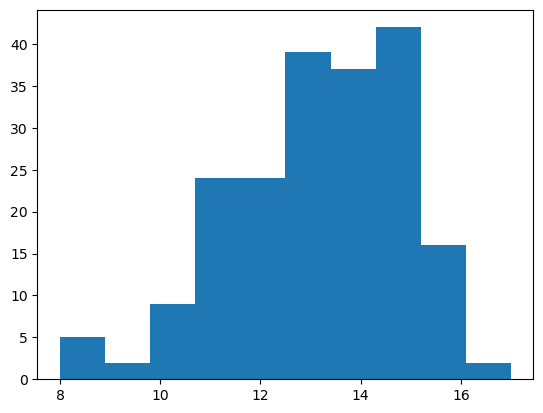

In [44]:
#using the matplotlib library to show a histogram
plt.hist(df['age'],bins=10)

<AxesSubplot:xlabel='age', ylabel='Count'>

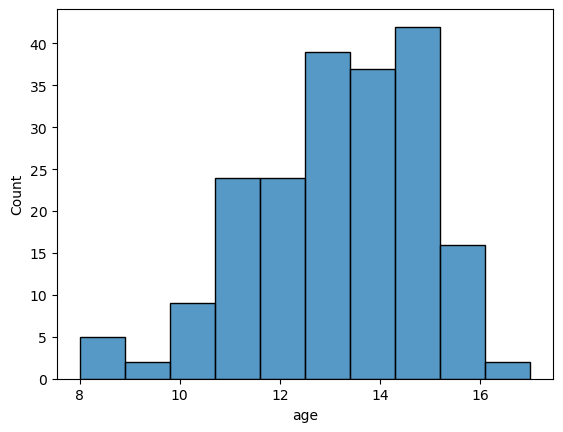

In [45]:
#using the seaborn library to show a histogram
sns.histplot(df['age'],bins=10)

<AxesSubplot:xlabel='age'>

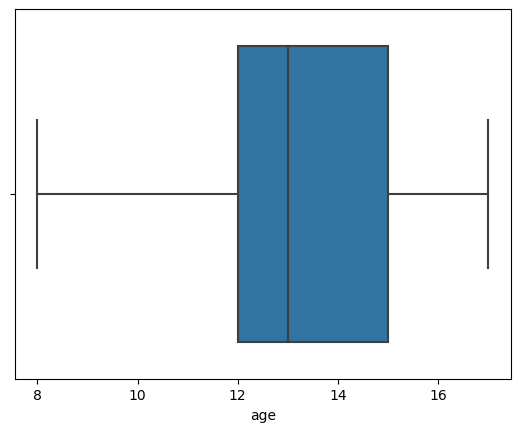

In [46]:
#using the seaborn library to show a boxplot
sns.boxplot(x=df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22d8f87cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x22d8f88d280>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d8f87caf0>],
 'medians': [<matplotlib.lines.Line2D at 0x22d8f88d820>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d8f88daf0>],
 'means': []}

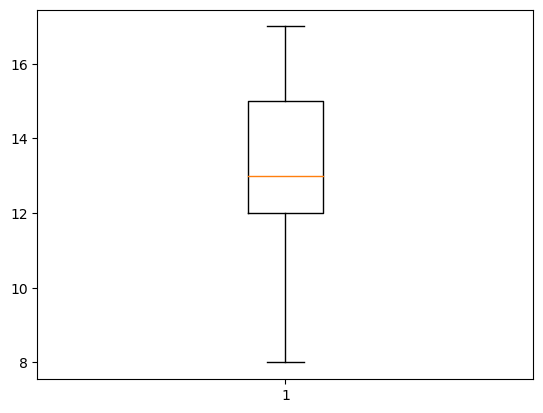

In [47]:
#using the matplotlib library to show a boxplot
plt.boxplot(x=df['age'])

#### *Grades/Scores of the first math test* 

<AxesSubplot:xlabel='1stmathstest'>

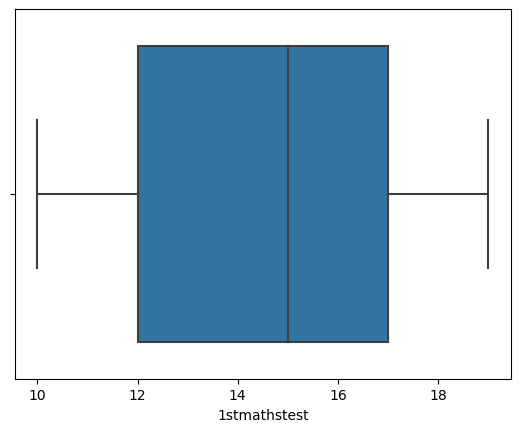

In [48]:
#boxplot
sns.boxplot(x = df['1stmathstest'])

<AxesSubplot:xlabel='1stmathstest', ylabel='Count'>

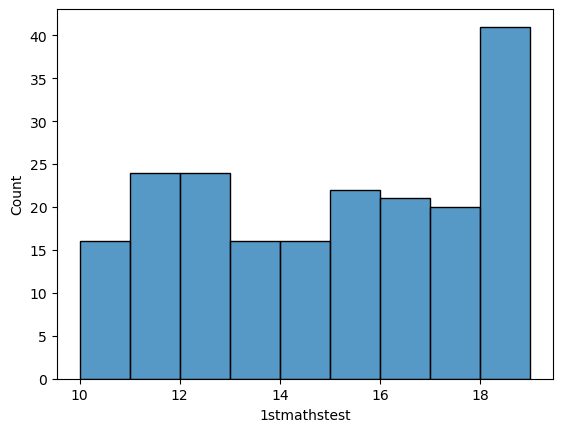

In [49]:
#histogram 
sns.histplot(x = df['1stmathstest'])

#### **Grades/Scores of the second math test* * 

<AxesSubplot:xlabel='2ndmathstest'>

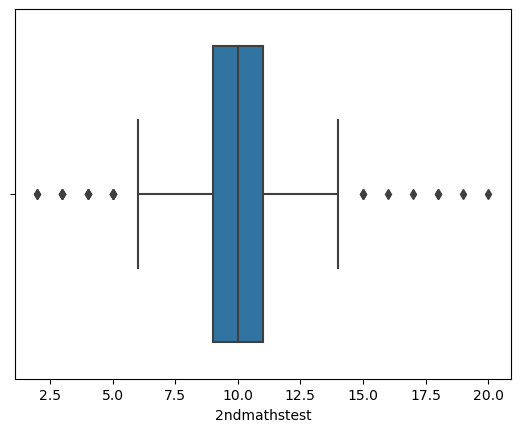

In [50]:
#boxplot
sns.boxplot(data = df, x = df['2ndmathstest'])

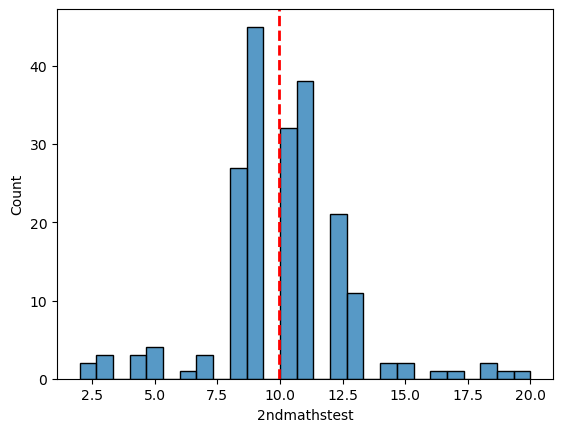

In [51]:
#histogram with additional information
sns.histplot(data = df, x = df['2ndmathstest'])
plt.axvline(df['2ndmathstest'].mean(), color='r', linestyle='dashed', linewidth=2)

#### **Grades/Scores of the third math test* * 

<AxesSubplot:xlabel='3rdmathstest'>

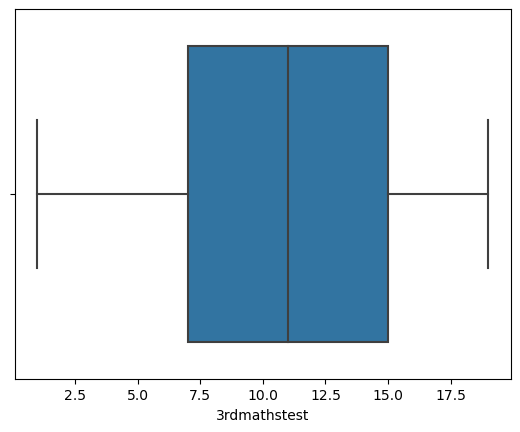

In [52]:
#boxplot
sns.boxplot(data = df, x = df['3rdmathstest'])

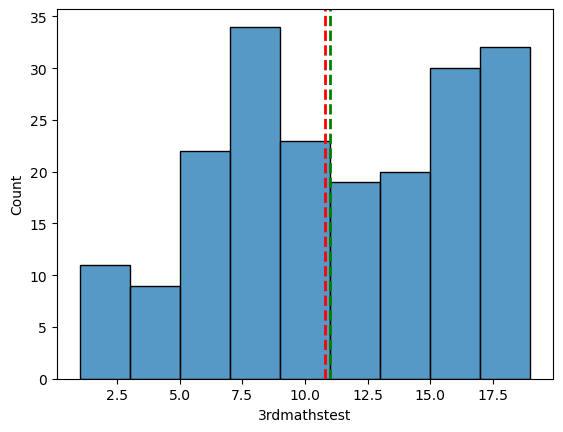

In [53]:
#histogram with additional information
sns.histplot(data = df, x = df['3rdmathstest'])
plt.axvline(df['3rdmathstest'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['3rdmathstest'].median(), color='g', linestyle='dashed', linewidth=2)

#### *Hours of study* 

<AxesSubplot:xlabel='hours'>

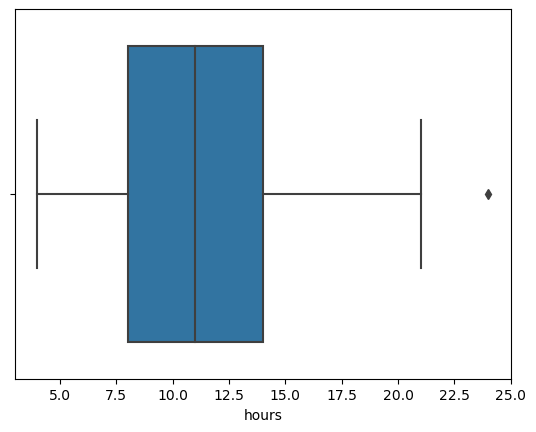

In [54]:
#boxplot 
sns.boxplot(data = df, x = df['hours'])

Text(15.869, 40.635, 'Mean: 11.34')

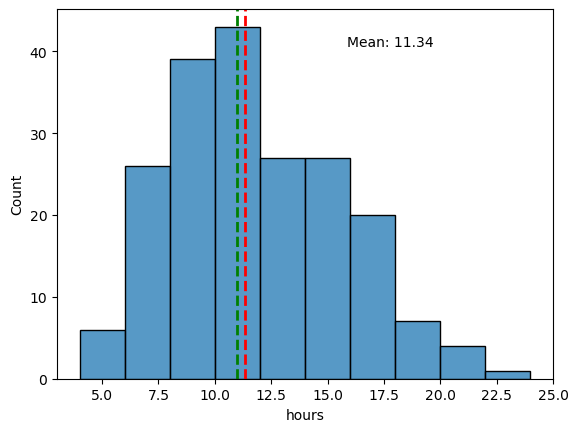

In [55]:
#histogram with additional information
sns.histplot(data = df, x = df['hours'])
plt.axvline(df['hours'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['hours'].median(), color='g', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(df['hours'].mean()*1.4, max_ylim*0.9, 'Mean: {:.2f}'.format(df['hours'].mean()))

c:\Users\JLM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours', ylabel='Density'>

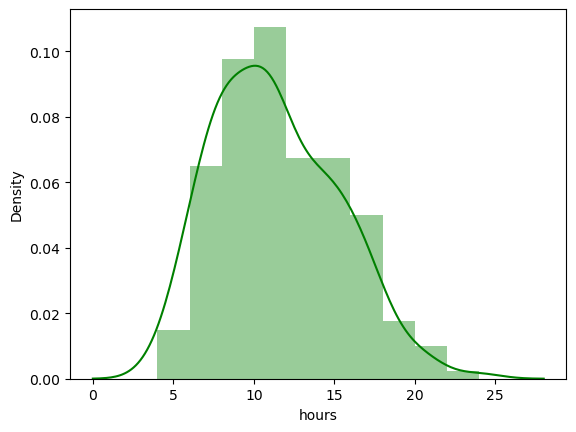

In [56]:
#using the seeborn library to show the distribution of a variable with an histogram    
sns.distplot(df['hours'], color= 'green')

<AxesSubplot:xlabel='hours', ylabel='Density'>

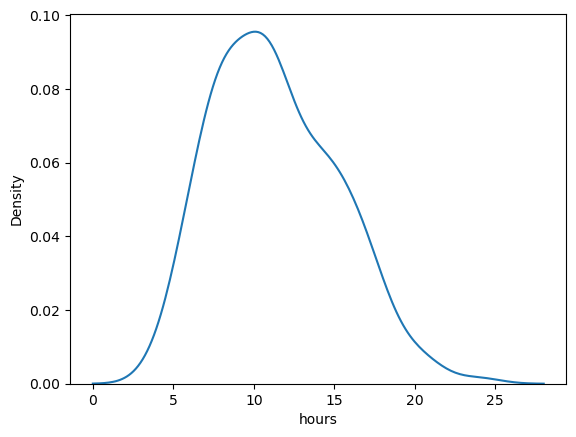

In [57]:
#using the seeborn library to show the distribution of a variable 
sns.kdeplot(df['hours'])

### **Visual representation of the categorical variables**

#### *Distribution of students by gender* 

[Text(0, 0, '95'), Text(0, 0, '105')]

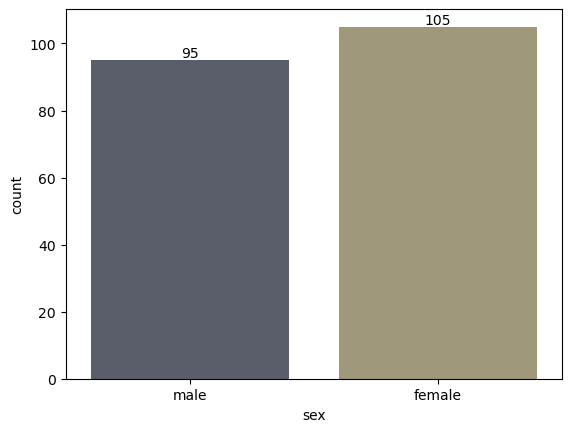

In [58]:
#bar chart
ax = sns.countplot(x=df['sex'], data=df , palette='cividis')
ax.bar_label(ax.containers[0])

In [59]:
#number of cases for the categorical variables 
df['sex'].value_counts()

female    105
male       95
Name: sex, dtype: int64

female    105
male       95
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

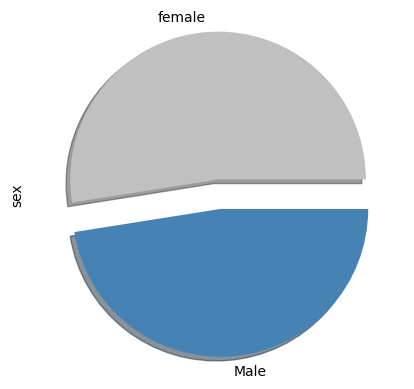

In [60]:
#using the matplotlib library to show a pie chart
gendercounts=df.sex.value_counts()
print(gendercounts)
myexplode = [0.1,0.1]
mylabels = ["female", "Male"]
gendercounts.plot(kind='pie', colors = ['silver', 'steelblue'], explode = myexplode, labels = mylabels,  shadow = True)

#### *Distribution of students by the size of the class* 

[Text(0, 0, '100'), Text(0, 0, '100')]

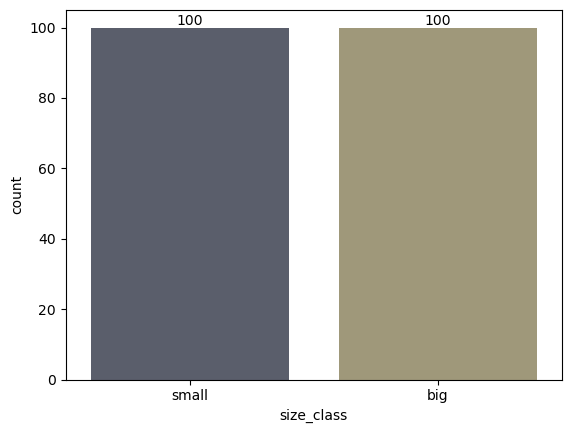

In [61]:
#bar chart
ax = sns.countplot(x=df['size_class'], data=df , palette='cividis')
ax.bar_label(ax.containers[0])

### **Visual representation of the categorical and numerical variables**

#### *Distribution of scores of first test in the three cycles* 

<function matplotlib.pyplot.show(close=None, block=None)>

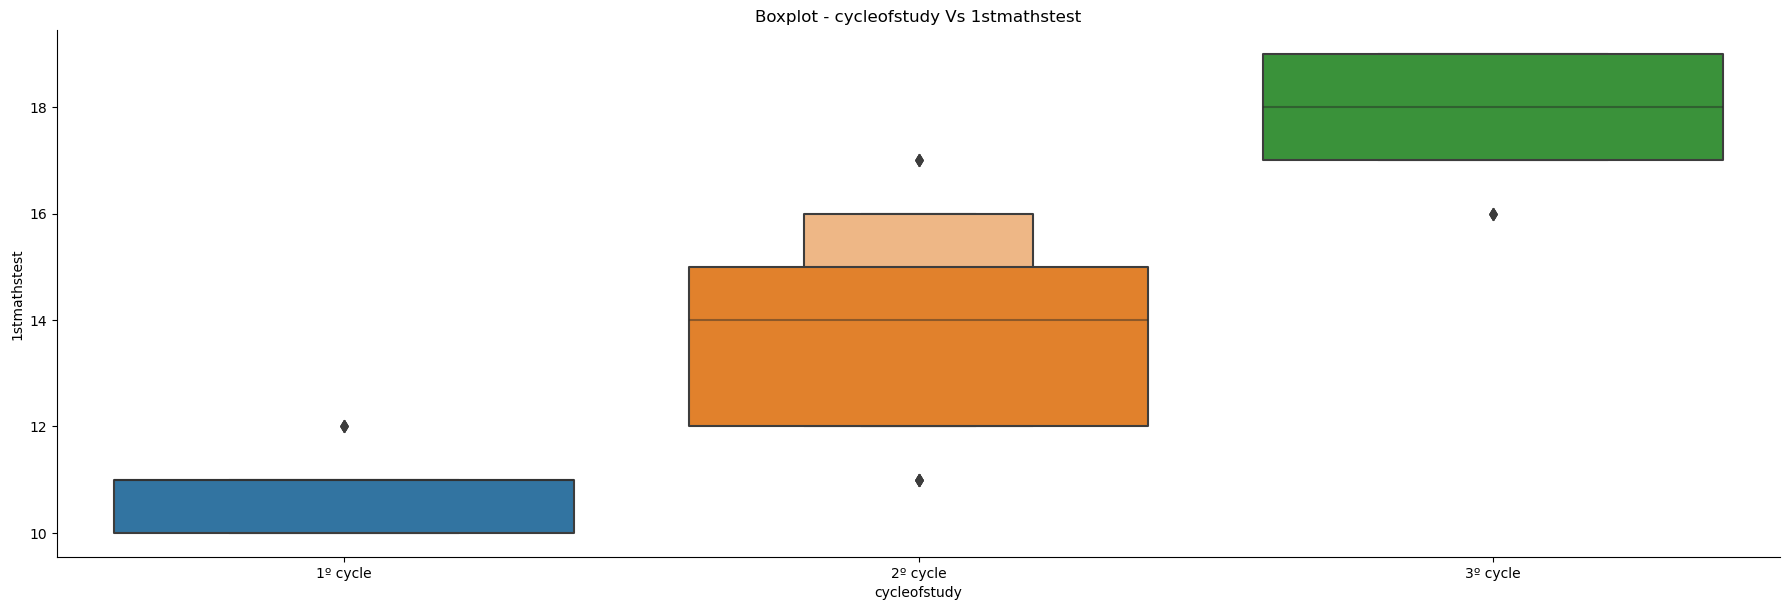

In [62]:
#multiple boxplots
sns.catplot(y='1stmathstest',x='cycleofstudy',data=df,kind="boxen",height=6, aspect=3)
plt.title("Boxplot - cycleofstudy Vs 1stmathstest")
plt.show

#### *Distribution of scores of second test in the three cycles* 

<function matplotlib.pyplot.show(close=None, block=None)>

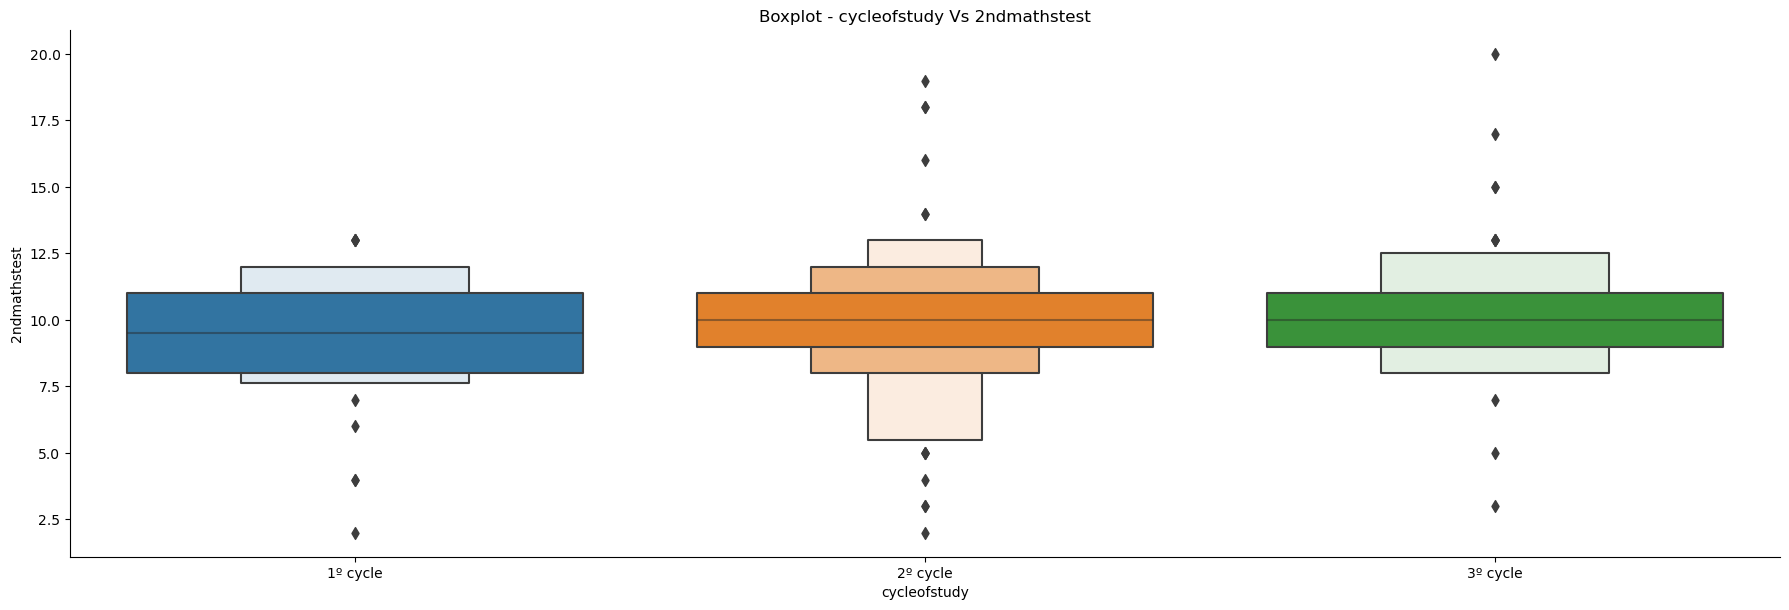

In [63]:
#multiple boxplots
sns.catplot(y='2ndmathstest',x='cycleofstudy',data=df, kind="boxen",height=6, aspect=3)
plt.title("Boxplot - cycleofstudy Vs 2ndmathstest")
plt.show

#### *Distribution of scores of third test in the three cycles* 

<function matplotlib.pyplot.show(close=None, block=None)>

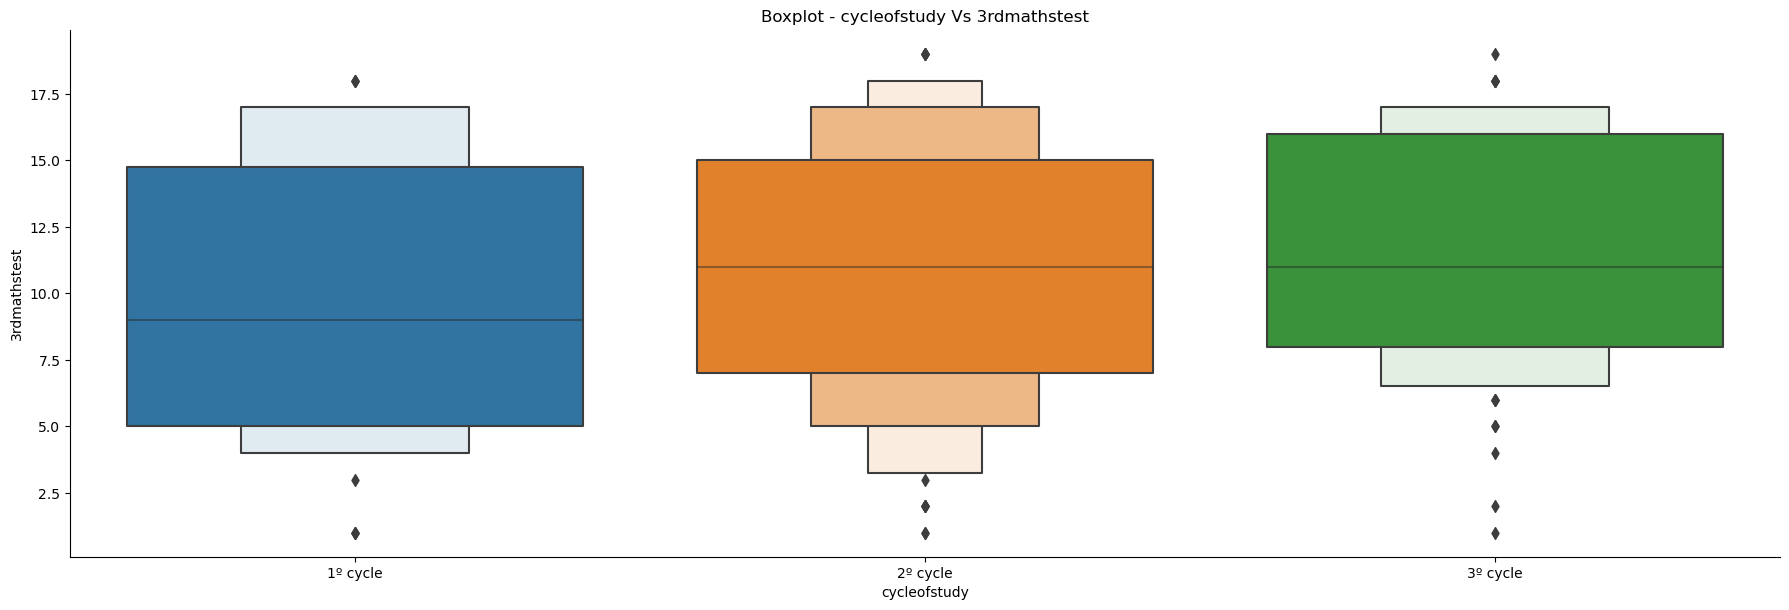

In [64]:
#multiple boxplots
sns.catplot(y='3rdmathstest',x='cycleofstudy',data=df,kind="boxen",height=6, aspect=3)
plt.title("Boxplot - cycleofstudy Vs 3rdmathstest")
plt.show

#### *Distribution of numbers of study hours the three cycles by gender* 

<function matplotlib.pyplot.show(close=None, block=None)>

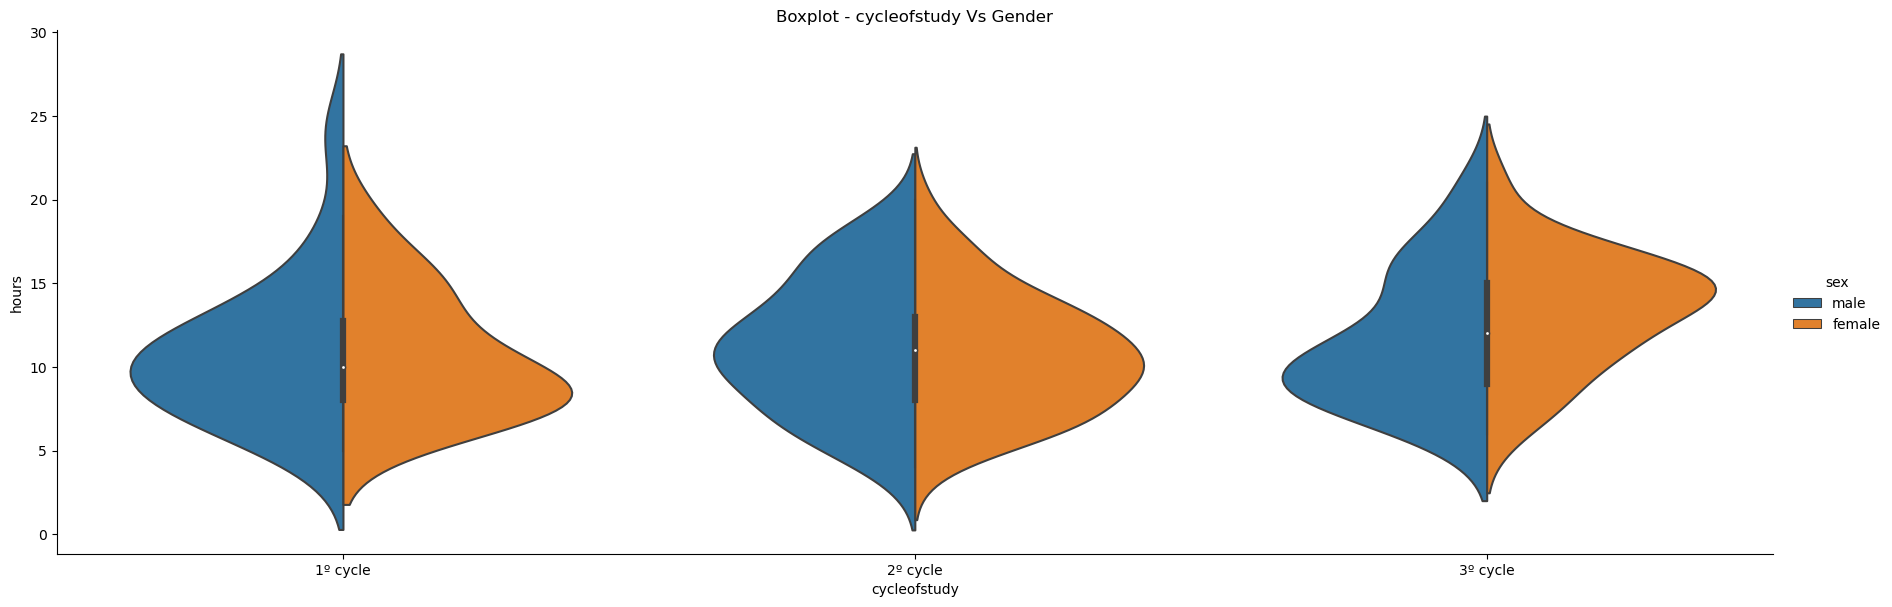

In [65]:
#Violin charts
sns.catplot(y='hours',x='cycleofstudy',data=df,kind='violin', hue="sex", split=True, height=6, aspect=3)
plt.title("Boxplot - cycleofstudy Vs Gender")
plt.show

c:\Users\JLM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

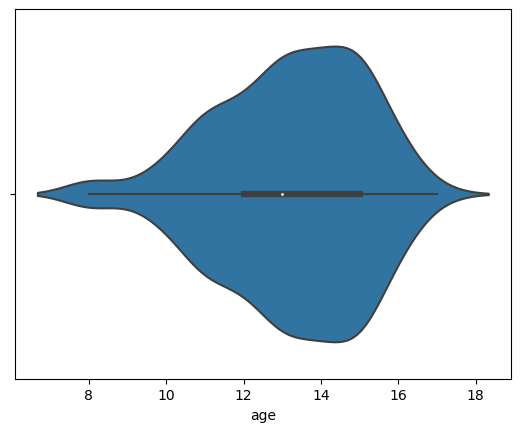

In [66]:
#using the seeborn library to show violin plot 
sns.violinplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='hours'>

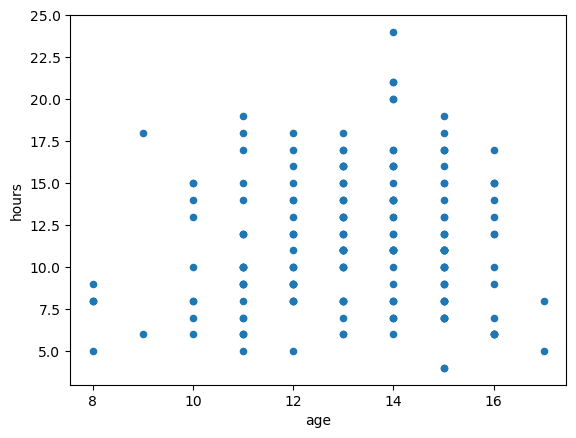

In [67]:
#using the seeborn library to show the distribution of a variable 
df.plot(kind='scatter', x='age', y='hours')

<AxesSubplot:xlabel='1stmathstest', ylabel='2ndmathstest'>

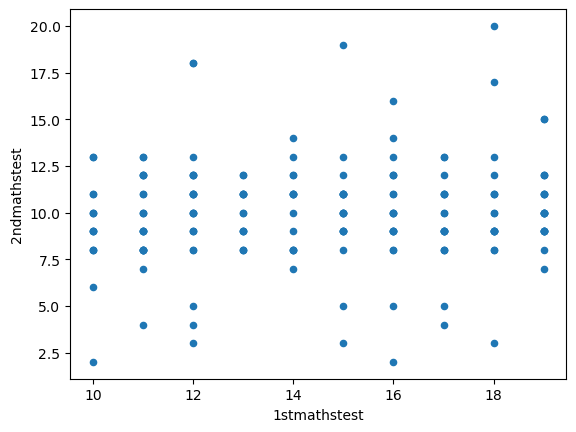

In [68]:
#using the matplotlib library to show a scatter plot
df.plot(kind='scatter', x='1stmathstest', y='2ndmathstest')